In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("titanic11.csv")
data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,family_size
0,343,0,2,male,28.0,0,0,248740,13.0000,0,2,0
1,76,0,3,male,25.0,0,0,348123,7.6500,0,2,0
2,641,0,3,male,20.0,0,0,350050,7.8542,0,2,0
3,568,0,3,female,29.0,0,4,349909,21.0750,0,2,4
4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,0,2,1


In [2]:
data["Sex"]=data["Sex"].map({"male":1,"female":2})
print("'S':0,'C':1,'Q':2")
data.head()

'S':0,'C':1,'Q':2


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,family_size
0,343,0,2,1,28.0,0,0,248740,13.0000,0,2,0
1,76,0,3,1,25.0,0,0,348123,7.6500,0,2,0
2,641,0,3,1,20.0,0,0,350050,7.8542,0,2,0
3,568,0,3,2,29.0,0,4,349909,21.0750,0,2,4
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,0,2,1


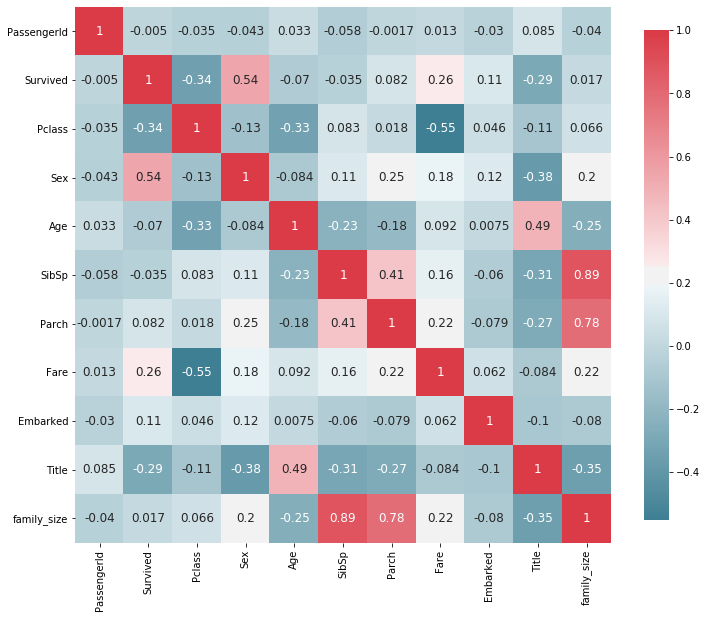

In [3]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data)

In [4]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=data[["Sex","Pclass","Title"]]
y=data["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.78


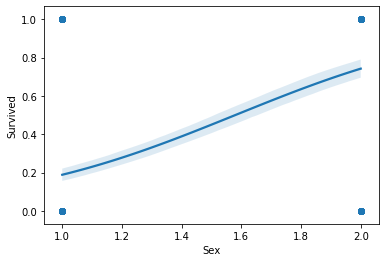

In [5]:
import seaborn as sns
sns.regplot(x='Sex',y='Survived',data=data,logistic=True)


In [6]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
x=classification_report(y_test,y_pred)


Predicted    0   1
Actual            
0          156  33
1           37  86
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       189
           1       0.72      0.70      0.71       123

    accuracy                           0.78       312
   macro avg       0.77      0.76      0.76       312
weighted avg       0.77      0.78      0.77       312



Text(0.5, 1, 'confusion_matrix')

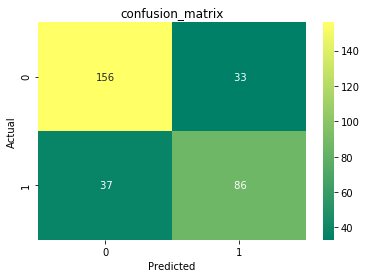

In [7]:
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
import matplotlib.pyplot as plt
plt.title('confusion_matrix')




In [8]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.762291908633372

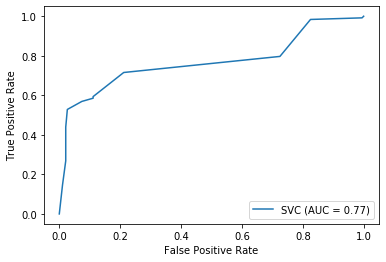

In [13]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm


clf.fit(x_train, y_train)

metrics.plot_roc_curve(clf, x_test, y_test)  # doctest: +SKIP
plt.show()    